## Voting Classfier 실습

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [15]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [22]:
# VotingClassifier 생성 및 기본 모델 추가
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn=KNeighborsClassifier()

vo_clf = VotingClassifier(estimators=[('LR',lr),('DT',dt),('KNN',knn)], voting='soft')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=100)

In [23]:
vo_clf.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

In [24]:
#정확도 출력
vo_clf.score(X_test,y_test)

0.9473684210526315

In [26]:
for clf in vo_clf.estimators_:
    print(clf)
    print(clf.score(X_test,y_test))

LogisticRegression()
0.935672514619883
DecisionTreeClassifier()
0.9415204678362573
KNeighborsClassifier()
0.9415204678362573


In [27]:
vo_clf.named_estimators_

{'LR': LogisticRegression(),
 'DT': DecisionTreeClassifier(),
 'KNN': KNeighborsClassifier()}

In [28]:
for clf in vo_clf.named_estimators_.items():
    print(clf)

('LR', LogisticRegression())
('DT', DecisionTreeClassifier())
('KNN', KNeighborsClassifier())


In [29]:
for name,clf in vo_clf.named_estimators_.items():
    print('{0} : {1:.3f}'.format(name, clf.score(X_test,y_test)))

LR : 0.936
DT : 0.942
KNN : 0.942


## RandomForest 실습

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
rf.score(X_test, y_test)

0.9590643274853801

In [52]:
# GridSearchCV활용
gird_params = {'n_estimators':[100,150,200], 'max_features':[3,6,9],'max_samples':[10,20,30]}
gs = GridSearchCV(rf,param_grid=gird_params,cv=5)

In [53]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [3, 6, 9], 'max_samples': [10, 20, 30],
                         'n_estimators': [100, 150, 200]})

In [55]:
# Accuracy랑 같음
gs.score(X_test,y_test)

0.9298245614035088

In [56]:
print('최적의 파라미터 :',gs.best_params_)
print('최고 예측 정확도 :', gs.best_score_)

최적의 파라미터 : {'max_features': 6, 'max_samples': 30, 'n_estimators': 100}
최고 예측 정확도 : 0.952246835443038


In [57]:
gs.best_estimator_.feature_importances_

array([0.04955456, 0.00647384, 0.02792408, 0.02556254, 0.00361231,
       0.02127754, 0.12975598, 0.13119371, 0.00720042, 0.00630265,
       0.0076119 , 0.00413445, 0.02451733, 0.02938183, 0.00173631,
       0.0038468 , 0.00496259, 0.00828421, 0.00351763, 0.00510769,
       0.08129309, 0.01635458, 0.12278325, 0.06795163, 0.00914384,
       0.00223899, 0.04205817, 0.13753056, 0.01281583, 0.00587167])

In [59]:
imp = pd.DataFrame({'feature':cancer.feature_names,
             'importance':gs.best_estimator_.feature_importances_})
imp

,feature,importance
0,mean radius,0.049555
1,mean texture,0.006474
2,mean perimeter,0.027924
3,mean area,0.025563
4,mean smoothness,0.003612
5,mean compactness,0.021278
6,mean concavity,0.129756
7,mean concave points,0.131194
8,mean symmetry,0.007200
9,mean fractal dimension,0.006303


<AxesSubplot:ylabel='feature'>

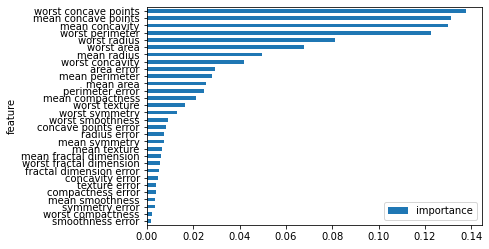

In [62]:
imp.sort_values(by='importance').plot(kind='barh', x='feature', y='importance')

## AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [67]:
ada.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [68]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

In [69]:
ada.base_estimator_

DecisionTreeClassifier(max_depth=2)

In [70]:
ada.score(X_test,y_test)

0.9707602339181286